# ANN, CNN, CNN with Batch Normalization and Dropout, Alex Net, Inception Net on MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Input, Dropout, Dense, Flatten, GlobalAveragePooling2D


import warnings
warnings.filterwarnings("ignore")

In [2]:
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU available")
else:
    print("GPU not available")

GPU available


In [3]:
(X_train, y_train), (X_test , y_test)  = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28 , 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28 , 1).astype('float32') / 255

train_labels = (y_train).astype(np.int64)
y_test = (y_test).astype(np.int64)

y_test.shape

(10000,)

In [8]:
y_test[10]

0

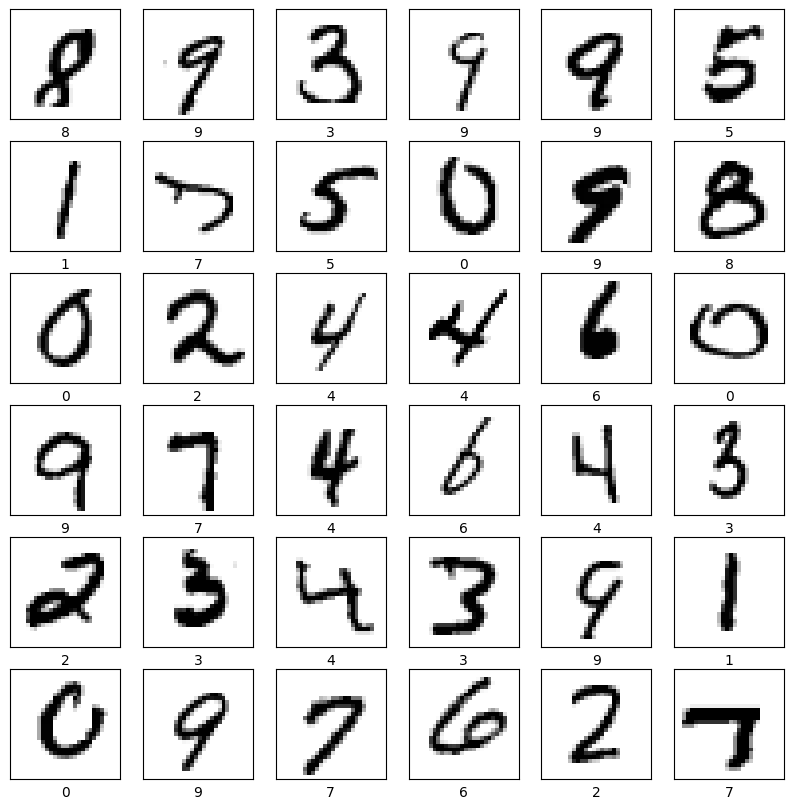

In [9]:
plt.figure(figsize = (10, 10))
random_ids = np.random.choice(60000, 36)
for i in range(36):
    plt.subplot(6,6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_id = random_ids[i]
    plt.imshow(np.squeeze(X_train[image_id]), cmap = plt.cm.binary)
    plt.xlabel(train_labels[image_id])

In [10]:
def build_ann_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(10, activation  = "softmax")
    ])
    return model

sequential_model = build_ann_model()

In [11]:
sequential_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 1e-1),
                        loss = 'sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [12]:
sequential_model.fit(X_train, train_labels, batch_size = 32, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2650 - accuracy: 0.9205
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1162 - accuracy: 0.9645
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0814 - accuracy: 0.9751
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0638 - accuracy: 0.9799
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0502 - accuracy: 0.9845
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0406 - accuracy: 0.9871
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0325 - accuracy: 0.9899
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0268 - accuracy: 0.9915
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0210 - accuracy: 0.9937
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

In [13]:
loss1 , accuracy1 = sequential_model.evaluate(X_test, y_test)
loss1, accuracy1

313/313 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9815


(0.0803363174200058, 0.9815000295639038)

In [14]:
X_train.shape

(60000, 28, 28, 1)

# Convolutional Neural Network

In [15]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
        # 28, 28 ,1
        tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = tf.nn.relu ),
        # 26, 26, 16
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # 13, 13, 16
        tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = tf.nn.relu),
        # 9, 9, 32
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # 4, 4, 32
        tf.keras.layers.Flatten(),
        # 4*4*32 = 512
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        # 128
        tf.keras.layers.Dense(10, activation = tf.nn.softmax)
    ])
    return cnn_model

basic_cnn_model = build_cnn_model()


In [16]:
basic_cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [17]:
basic_cnn_model.fit(X_train, train_labels, batch_size = 32, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 11s 4ms/step - loss: 0.1514 - accuracy: 0.9534
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0481 - accuracy: 0.9848
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0335 - accuracy: 0.9892
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0247 - accuracy: 0.9918
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0124 - accuracy: 0.9961
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0107 - accuracy: 0.9965
Epoch 9/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0089 - accuracy: 0.9971
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.00

In [18]:
basic_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [19]:
loss2, accuracy2 = basic_cnn_model.evaluate(X_test, y_test)
loss2, accuracy2

313/313 [==============================] - 1s 3ms/step - loss: 0.0526 - accuracy: 0.9907


(0.05263310670852661, 0.9907000064849854)

In [20]:
def build_powerful_cnn_model():
    cnn_model = tf.keras.Sequential([
        # Define input shape explicitly
        tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),

        # First Convolutional Block
        # 28, 28, 1 -> 26, 26, 16
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        # Second Convolutional Block
        # 13, 13, 16 -> 9, 9, 32
        tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        # Flatten Layer: 4, 4, 32 -> 512
        tf.keras.layers.Flatten(),

        # Fully Connected Block
        # Dense Layer: 512 -> 128
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        # Output Layer: 128 -> 10
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return cnn_model

# Build the model
powerful_cnn_model = build_powerful_cnn_model()

# Compile the model
powerful_cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
powerful_cnn_model.fit(X_train, train_labels, batch_size=32, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 14s 5ms/step - loss: 0.2707 - accuracy: 0.9166
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1118 - accuracy: 0.9660
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0890 - accuracy: 0.9725
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0769 - accuracy: 0.9763
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0686 - accuracy: 0.9782
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0614 - accuracy: 0.9809
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0566 - accuracy: 0.9820
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0532 - accuracy: 0.9838
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0517 - accuracy: 0.9842
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss:

In [21]:
powerful_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 32)          12832     
                                                                 
 batch_normalization_1 (Bat  (None, 9, 9, 32)         

In [22]:
loss3, accuracy3 = powerful_cnn_model.evaluate(X_test, y_test)
loss3, accuracy3

313/313 [==============================] - 1s 3ms/step - loss: 0.0205 - accuracy: 0.9930


(0.020471032708883286, 0.9929999709129333)

# Alex Net

In [23]:
def build_alexnet_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        # 1st Convolutional Layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # 2nd Convolutional Layer
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # 3rd Convolutional Layer
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        # 4th Convolutional Layer
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        # 5th Convolutional Layer
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # Flattening Layer
        tf.keras.layers.Flatten(),

        # 1st Fully Connected Layer
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        # 2nd Fully Connected Layer
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        # Output Layer
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model


input_shape = (28, 28, 1)
num_classes = 10
alexnet_model = build_alexnet_model(input_shape, num_classes)


In [24]:
alexnet_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [25]:
alexnet_model.fit(X_train, train_labels, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 18s 8ms/step - loss: 0.1750 - accuracy: 0.9495 - val_loss: 0.0781 - val_accuracy: 0.9760
Epoch 2/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0753 - accuracy: 0.9776 - val_loss: 0.0524 - val_accuracy: 0.9840
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0606 - accuracy: 0.9821 - val_loss: 0.0338 - val_accuracy: 0.9907
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0525 - accuracy: 0.9849 - val_loss: 0.0455 - val_accuracy: 0.9877
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0455 - accuracy: 0.9868 - val_loss: 0.0559 - val_accuracy: 0.9840
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0391 - accuracy: 0.9885 - val_loss: 0.0353 - val_accuracy: 0.9904
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0563 - val_ac

In [26]:
alexnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

In [27]:
loss_alex, accuracy_alex = alexnet_model.evaluate(X_test, y_test)
loss_alex, accuracy_alex

313/313 [==============================] - 2s 4ms/step - loss: 0.0303 - accuracy: 0.9934


(0.030346959829330444, 0.993399977684021)

# Inception NET

In [28]:
def inception_module(prev_layer, filters):
    conv1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), activation='relu')(prev_layer)

    conv3x3 = Conv2D(filters=filters[1], kernel_size=(3, 3), padding='same', activation='relu')(prev_layer)

    maxpool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(prev_layer)
    maxpool_conv1x1 = Conv2D(filters=filters[2], kernel_size=(1, 1), activation='relu')(maxpool)

    return Concatenate(axis=-1)([conv1x1, conv3x3, maxpool_conv1x1])

def build_inception_mnist(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial Convolution and Pooling Layers
    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Inception Modules
    x = inception_module(x, filters=[16, 32, 8])
    x = inception_module(x, filters=[32, 64, 16])

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    # Define the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (28, 28, 1)
num_classes = 10

inception_mnist_model = build_inception_mnist(input_shape, num_classes)


In [29]:
inception_mnist_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

In [30]:
inception_mnist_model.fit(X_train, train_labels, batch_size = 32, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 14s 5ms/step - loss: 0.8383 - accuracy: 0.7063
Epoch 2/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2998 - accuracy: 0.9111
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2198 - accuracy: 0.9372
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1761 - accuracy: 0.9502
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1430 - accuracy: 0.9601
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1209 - accuracy: 0.9654
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1050 - accuracy: 0.9700
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0934 - accuracy: 0.9730
Epoch 9/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0834 - accuracy: 0.9761
Epoch 10/20
1875/1875 [==============================] - 10s 6ms/step - l

In [31]:
inception_mnist_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_9 (Conv2D)           (None, 28, 28, 32)           320       ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)           0         ['conv2d_9[0][0]']            
 g2D)                                                                                             
                                                                                                  
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)           0         ['max_pooling2d_7[0][0]'] 

In [32]:
loss_inception, accuracy_inception = inception_mnist_model.evaluate(X_test, y_test)
loss_inception, accuracy_inception

313/313 [==============================] - 2s 5ms/step - loss: 0.0307 - accuracy: 0.9908


(0.03073299303650856, 0.9908000230789185)

In [33]:
model_names = ['Dense', 'CNN', 'CNN with Batch Norm and Dropout', 'Alex Net', 'Inception Net']
losses = [loss1, loss2, loss3, loss_alex, loss_inception]
accuracies = [accuracy1, accuracy2, accuracy3, accuracy_alex, accuracy_inception]

results = pd.DataFrame({
    'model_name': model_names,
    'loss': losses,
    'accuracy': accuracies
})

print(results.head())

                        model_name      loss  accuracy
0                            Dense  0.080336    0.9815
1                              CNN  0.052633    0.9907
2  CNN with Batch Norm and Dropout  0.020471    0.9930
3                         Alex Net  0.030347    0.9934
4                    Inception Net  0.030733    0.9908
